# Fantasy vs Science Fiction

---
## Problem Statment

Where should an aspiring fantasy/scifi writer focus their attentions? Is there interest in the crossover genre of sci-fantasy?

---
## Background

The data included has been obtained from the [Fantasy](https://www.reddit.com/r/Fantasy/) and [Science Fiction](https://www.reddit.com/r/scifi/) subreddits on Reddit.

As a fan of both fantasy and science fiction I was interested in how much overlap occurs between the two genres. 

Fantasy has arguably existed longer.
>The history of fantasy is as old as humanity itself. Every cultrue around the world has their own myths and folklore that they use to impart lessons or carry on pieaces of their hystory. [Amanda Pagan, Stavros Niarchos Foundation Library](https://www.nypl.org/blog/2020/05/18/hallmarks-fantasy-brief-history-fantasy)

Not as old, but science fiction has been around for over two centuries.
>Many literary experst consider Mary Shelley's *Frankenstein*, published in 1818, to be the first true work of sciene fiction, follow eight years later by her novel *The Last Man*, which also happened to become one of the first post_apocalyptic works, thus establishing that sub-genre of science fiction. [Dr. David Powers, Battlefield Eartch](https://battlefieldearth.com/a-short-history-of-the-birth-of-sci-fi/)



## Data Import and Cleaning

In [11]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# read in the two subreddit data sets
fantasy = pd.read_csv("../data/subreddit1-data.csv")
scifi = pd.read_csv("../data/subreddit2-data.csv")

In [13]:
fantasy.head()

,title,post,subreddit
0,I need Trashy Sapphic Book Recs?,Do you know those fae beauty and the beast ret...,fantasy
1,Better late than never... finally read the ACO...,I hear a hoard of angry ACOTAR fans enter my t...,fantasy
2,Romantic fantasy novel for a husband and wife ...,"Hello everyone, for our 5th wedding anniversar...",fantasy
3,"Book hangover from Victoria Goddard, recommend...",I've read everything Victoria Goddard has on h...,fantasy
4,Kingdom of the Wicked Trilogy… Spoilers ahead,KotW Trilogy wrap up…\n\nIt seemed like the en...,fantasy


In [14]:
scifi.head()

,title,post,subreddit
0,I refuse to believe that we have this.... beca...,NaN,scifi
1,Do you think it is possible to drive with the ...,This concept seems pretty cool and I wonder wh...,scifi
2,"""Mining industry in space"" by me, 3D, 2024",NaN,scifi
3,Revisiting a childhood favorite story: ‘Dreams...,I had a blast Sunday re-reading one of my favo...,scifi
4,They Live! A Classic Sci-Fi Carpenter Film,NaN,scifi


In [15]:
# check for nulls
print(fantasy.isnull().sum())
print(scifi.isnull().sum())

title         0
post         37
subreddit     0
dtype: int64
title          0
post         825
subreddit      0
dtype: int64


*Neither subreddit has any empty titles, but there are a few fantasy and many more scifi posts that have empty post text. The scifi subreddit does have more people posting images or links so this makes sense.*

In [16]:
# check size of each dataframe
print(fantasy.shape)
print(scifi.shape)

(1314, 3)
(1553, 3)


*I'm interested in seeing if the titles have as much impact as the post content. I'm going to combine the two dataframes and then fill empty posts with white space that won't vectorize to any text. After this I can investigate titles and posts separately.*

In [17]:
# combine two subreddit dataframes
combined = pd.concat((fantasy, scifi))

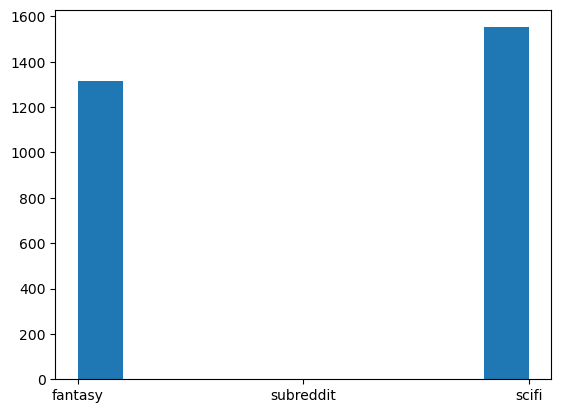

In [18]:
# check initial distribution of subreddits
plt.hist(combined["subreddit"]);

*A couple entries came through with literally subreddit as the entry, checking these.*

In [19]:
combined[combined["subreddit"] == "subreddit"]

,title,post,subreddit
991,title,post,subreddit
963,title,post,subreddit


*Only a couple of these, going to drop. It looks like somewhere in my data collection the columns made it in as an observation.*

In [20]:
# dropping meaningless posts
combined = combined.drop(combined[combined["subreddit"] == "subreddit"].index)

# fill empty posts with white space
combined.fillna(" ", inplace=True)

# saving cleaned and combined dataset
combined.to_csv("../data/combined_subreddits.csv", index=False)

---
### Data Dictionary

All data collected from the [fantasy](https://www.reddit.com/r/Fantasy/) and [scifi](https://www.reddit.com/r/scifi/) subreddits on Reddit.com.
|Feature|Type|Discription|
|---|---|---|
|**title**|*string*|Title of the subreddit post|
|**post**|*string*|Text content of the subreddit post|

---
## EDA

### Titles only

Investigating titles only first.

In [21]:
# create column showing title length and word counts
combined["title_length"] = combined["title"].map(lambda x: len(x))
combined["title_word_count"] = combined["title"].map(lambda x: len(x.split()))

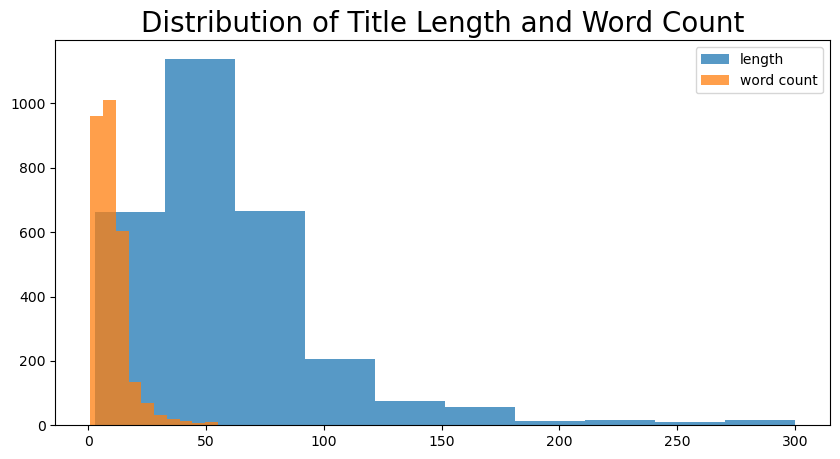

In [22]:
# see distribution of title length and word count
plt.figure(figsize=(10, 5))
plt.hist(combined["title_length"], alpha=0.75, label="length")
plt.hist(combined["title_word_count"], alpha=0.75, label="word count")
plt.title("Distribution of Title Length and Word Count", size = 20)
plt.legend();

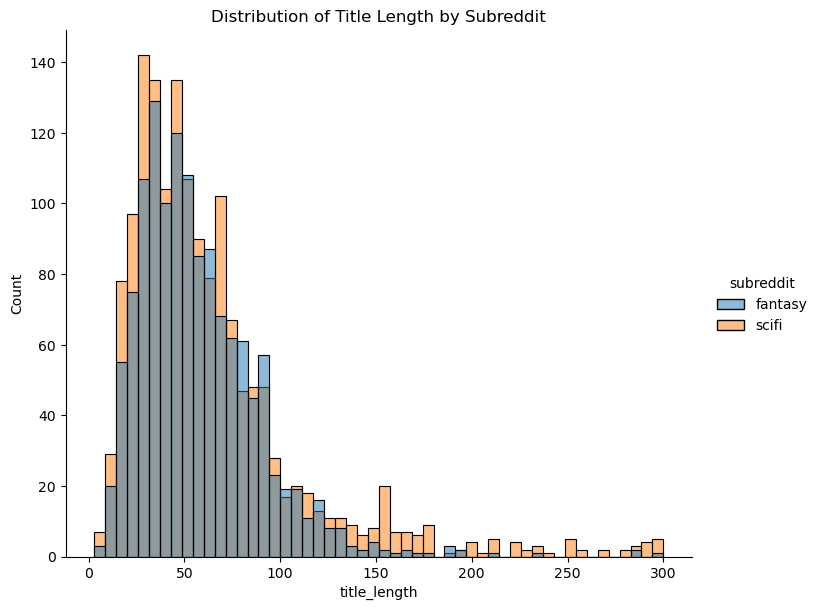

In [23]:
# see title length per subreddit
tl_plot = sns.displot(data=combined, x="title_length", hue="subreddit", height=6, aspect=1.2)
tl_plot.set(title = "Distribution of Title Length by Subreddit");

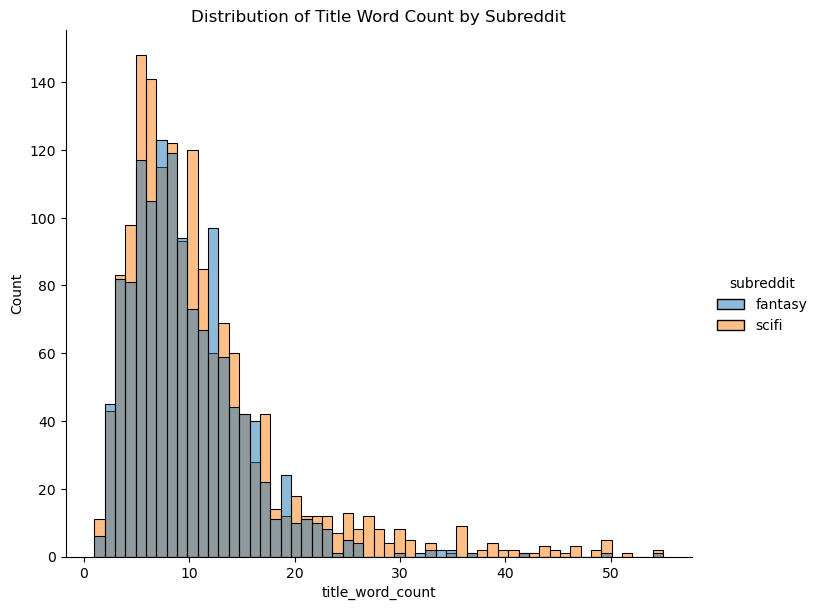

In [24]:
# see title word count per subreddit
twc_plot = sns.displot(data=combined, x="title_word_count", hue="subreddit", height=6, aspect=1.2)
twc_plot.set(title="Distribution of Title Word Count by Subreddit");

*Fantasy and scifi appear to have similar distributions of title length and word count, not a feature I'll need to include.*

In [25]:
# tokenize titles and lemmatize
combined["title"] = combined["title"].map(lambda x: word_tokenize(x.lower()))

lem = WordNetLemmatizer()
combined["title"] = combined["title"].map(lambda x: " ".join([lem.lemmatize(i) for i in x]))

In [26]:
combined.head()

,title,post,subreddit,title_length,title_word_count
0,i need trashy sapphic book recs ?,Do you know those fae beauty and the beast ret...,fantasy,32,6
1,better late than never ... finally read the ac...,I hear a hoard of angry ACOTAR fans enter my t...,fantasy,81,15
2,romantic fantasy novel for a husband and wife ...,"Hello everyone, for our 5th wedding anniversar...",fantasy,63,11
3,"book hangover from victoria goddard , recommen...",I've read everything Victoria Goddard has on h...,fantasy,54,6
4,kingdom of the wicked trilogy… spoiler ahead,KotW Trilogy wrap up…\n\nIt seemed like the en...,fantasy,46,7


In [27]:
# count vectorize to see most common words
cvec = CountVectorizer()

cvec.fit(combined["title"])

CountVectorizer()

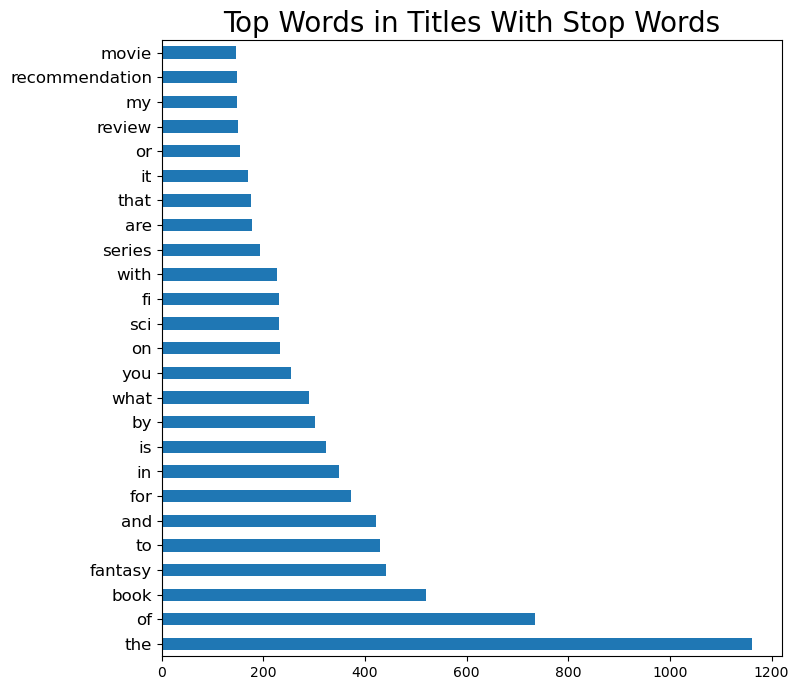

In [28]:
titles_cvec = pd.DataFrame(cvec.transform(combined["title"]).todense(), columns=cvec.get_feature_names_out())

plt.figure(figsize=(8, 8))
titles_cvec.sum().sort_values(ascending=False).head(25).plot(kind="barh")
plt.title("Top Words in Titles With Stop Words", size=20)
plt.yticks(fontsize=12);

*A lot of people include the explicit words fantasy of sci fi in the titles of their posts. That should be helpful for my model. Now doing the same without stop words.*

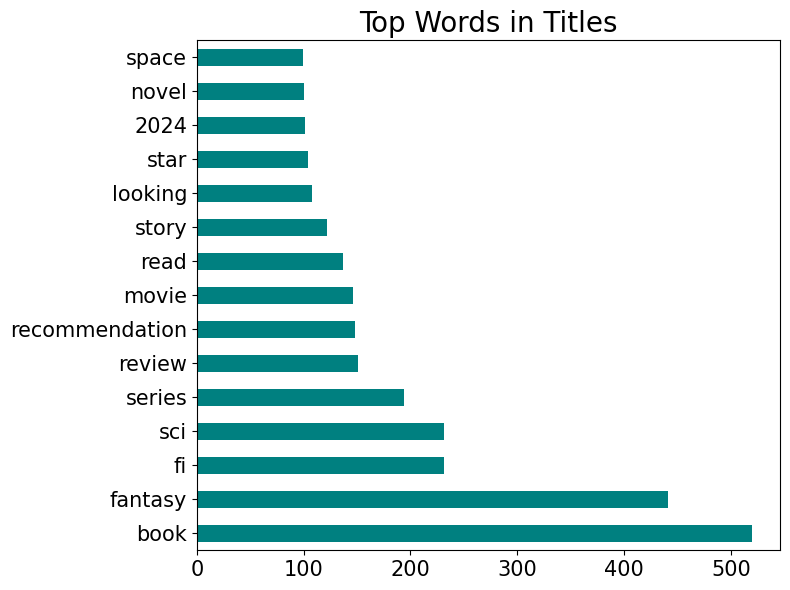

In [29]:
# count vectorize to see most common words without stop words
cvec = CountVectorizer(stop_words="english")

cvec.fit(combined["title"])

titles_cvec = pd.DataFrame(cvec.transform(combined["title"]).todense(), columns=cvec.get_feature_names_out())

plt.figure(figsize=(8, 6))
titles_cvec.sum().sort_values(ascending=False).head(15).plot(kind="barh", color="teal")
plt.title("Top Words in Titles", size=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.savefig("../images/top_words_title.png");

Looking at the top 10 words and how they are distributed between each subreddit. First I'll need to rename a couple columns in the vectorized dataframe because those became columns from the count vectorized text.

In [30]:
titles_cvec.rename(columns={"title": "title_title", "subreddit": "subreddit_title"}, inplace=True)

In [31]:
# add countvectorized text to subreddit column
combined.reset_index(drop=True, inplace=True)

combined_and_title_cvec = pd.concat((combined, titles_cvec), axis=1)

In [32]:
# check counts for top 10 words
top_10 = ["book", "fantasy", "sci", "fi", "series", "recommendation",
         "review", "movie", "read", "story"]
combined_and_title_cvec.groupby(by="subreddit")[top_10].sum()

,book,fantasy,sci,fi,series,recommendation,review,movie,read,story
subreddit,,,,,,,,,,
fantasy,378,413,7,7,120,115,96,8,102,47
scifi,142,28,224,224,74,33,55,138,35,75


*There are more mentions of the word fantasy in scifi reddit titles than I would have thought, but still only about 7% of all mentions of the word. There are also more books and reading mentioned in fantasy than sci, and almost all movie mentions are in scifi.*

In [51]:
# count vectorize again with bi and tri grams
cvec = CountVectorizer(stop_words="english", ngram_range=(2, 3))

cvec.fit(combined["title"])

CountVectorizer(ngram_range=(2, 3), stop_words='english')

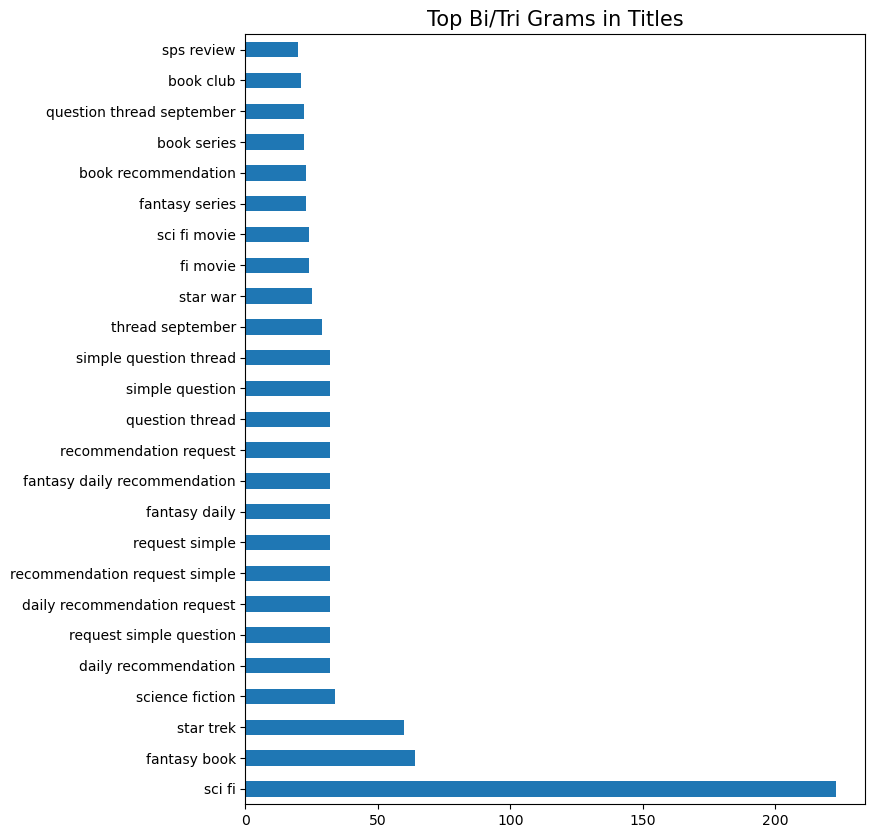

In [52]:
# see top bi and tri grams
titles_cvec_bi_tri = pd.DataFrame(cvec.transform(combined["title"]).todense(), columns=cvec.get_feature_names_out())

plt.figure(figsize=(8, 10))
titles_cvec_bi_tri.sum().sort_values(ascending=False).head(25).plot(kind="barh")
plt.title("Top Bi/Tri Grams in Titles", size =15);

In [36]:
# see break down of top 10 between subreddits
combined_and_title_bi_tri = pd.concat((combined, titles_cvec_bi_tri), axis = 1)

top_10_bi_tri = ["sci fi", "fantasy book", "star trek", "science fiction",
                 "question thread", "request simple question", "request simple",
                 "fantasy daily", "simple question thread", "simple question"]

combined_and_title_bi_tri.groupby(by="subreddit")[top_10_bi_tri].sum()                 

,sci fi,fantasy book,star trek,science fiction,question thread,request simple question,request simple,fantasy daily,simple question thread,simple question
subreddit,,,,,,,,,,
fantasy,6,60,0,2,30,30,30,30,30,30
scifi,212,1,59,31,0,0,0,0,0,0


*Pretty low counts after the top three bi grams, and I should be able to account for each word in the top three bi-grams with the single words.*

---
### Post Content
Going to look into the content of the posts now.

In [47]:
combined.head()

,title,post,subreddit
0,i need trashy sapphic book recs ?,Do you know those fae beauty and the beast ret...,fantasy
1,better late than never ... finally read the ac...,I hear a hoard of angry ACOTAR fans enter my t...,fantasy
2,romantic fantasy novel for a husband and wife ...,"Hello everyone, for our 5th wedding anniversar...",fantasy
3,"book hangover from victoria goddard , recommen...",I've read everything Victoria Goddard has on h...,fantasy
4,kingdom of the wicked trilogy… spoiler ahead,KotW Trilogy wrap up…\n\nIt seemed like the en...,fantasy


In [60]:
# tokenize posts and lemmatize
combined["post"] = combined["post"].map(lambda x: word_tokenize(x.lower()))

lem = WordNetLemmatizer()
combined["post"] = combined["post"].map(lambda x: " ".join([lem.lemmatize(i) for i in x]))

In [61]:
cvec = CountVectorizer(stop_words="english")

cvec.fit(combined["post"])

CountVectorizer(stop_words='english')

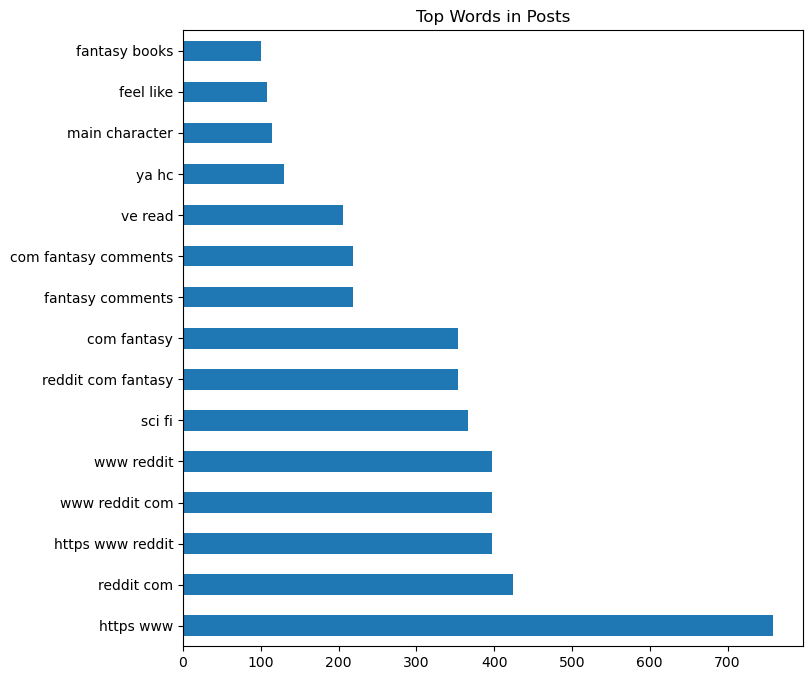

In [29]:
posts_cvec = pd.DataFrame(cvec.transform(combined["post"]).todense(), columns=cvec.get_feature_names_out())

plt.figure(figsize=(8, 8))
posts_cvec.sum().sort_values(ascending=False).head(15).plot(kind="barh")
plt.title("Top Words in Posts");

*Books are mentioned a lot in post text, but it looks like movies not as often as in titles. This makes sense because more scifi titles included the word movie but the scifi subreddit didn't have as many posts with text.*

In [68]:
# check for duplicate columns between posts and posts_cvec
for column in posts_cvec.columns:
    if column in combined.columns:
        print(column)

In [73]:
# rename columns to eliminate duplicates before combining dataframes
posts_cvec.rename(columns={"title": "title_post",
                           "post": "post_post",
                           "subreddit": "subreddit_post"}, inplace=True)

# combine posts with vectorized text dataframe
combined_and_post_cvec = pd.concat((combined, posts_cvec), axis=1)

In [74]:
# see distribution of words in post text between subreddits
top_10_post = ["book", "wa", "like", "fantasy", "character",
               "read", "just", "story", "series", "http"]

combined_and_post_cvec.groupby("subreddit")[top_10_post].sum()

,book,wa,like,fantasy,character,read,just,story,series,http
subreddit,,,,,,,,,,
fantasy,2813,1490,1350,1606,1231,1104,944,940,995,838
scifi,439,666,481,50,171,202,349,290,196,265


*Similar to the titles, books and reading are mentioned much more often for fantasy subreddit posts. There's also a stronger correlation between mentioning a series and fantasy in posts.*

In [26]:
# looking at bi and tri grams in posts
cvec = CountVectorizer(stop_words="english", ngram_range=(2, 3))

cvec.fit(combined["post"])

CountVectorizer(ngram_range=(2, 3), stop_words='english')

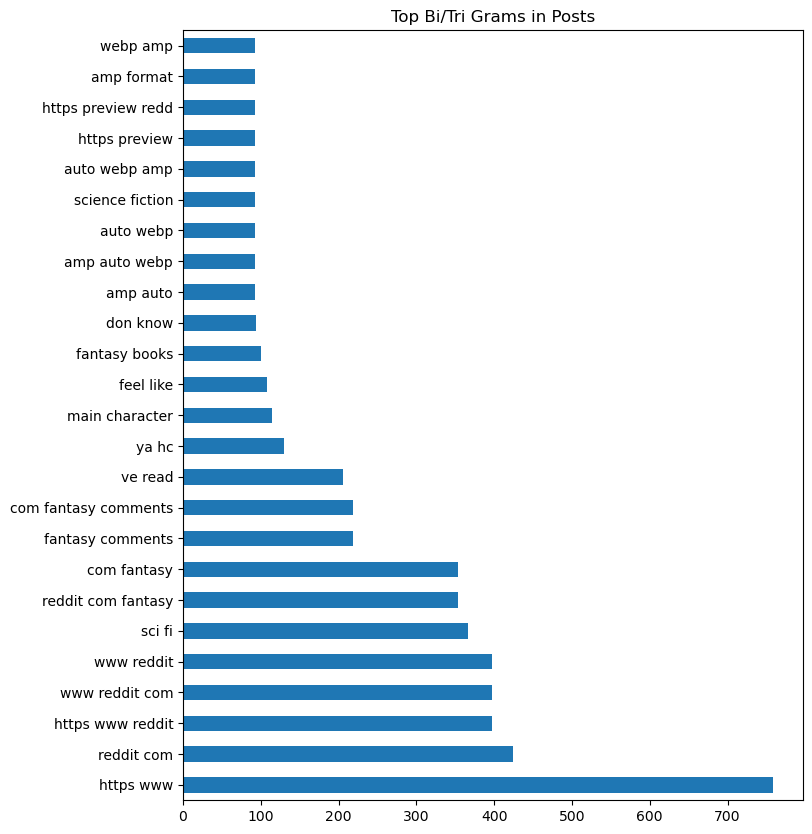

In [30]:
posts_cvec_bi_tri = pd.DataFrame(cvec.transform(combined["post"]).todense(), columns=cvec.get_feature_names_out())

plt.figure(figsize=(8, 10))
posts_cvec_bi_tri.sum().sort_values(ascending=False).head(25).plot(kind="barh")
plt.title("Top Bi/Tri Grams in Posts");

*There appear to be a lot of urls (http was in the top ten by itself), let's see how they distribute between subreddits.*

In [50]:
# see break down of top 10 bi and tri grams between subreddits
combined_and_post_bi_tri = pd.concat((combined, posts_cvec_bi_tri), axis = 1)

top_10_post_bi_tri = ["http www", "reddit com", "www reddit", "sci fi", "www reddit com",
                       "http www reddit", "com fantasy", "reddit com fantasy", "ve read", "fantasy comments"]

combined_and_post_bi_tri.groupby(by="subreddit")[top_10_post_bi_tri].sum()     

,http www,reddit com,www reddit,sci fi,www reddit com,http www reddit,com fantasy,reddit com fantasy,ve read,fantasy comments
subreddit,,,,,,,,,,
fantasy,549,353,328,91,328,326,297,297,166,169
scifi,142,15,14,251,14,14,0,0,22,0


*Almost all bi/tri grams in the post content correlates with fantasy, except "sci fi". "Sci fi" also has a lot of mentions in fantasy posts.*

---
### Titles and Posts

Going to look at top words in titles and posts.

In [31]:
# making column of titles and posts to check top words
combined["title_and_post"] = combined["title"] + " " + combined["post"]

# tokenize combined column and lemmatize
combined["title_and_post"] = combined["title_and_post"].map(lambda x: word_tokenize(x.lower()))

lem = WordNetLemmatizer()
combined["title_and_post"] = combined["title_and_post"].map(lambda x: " ".join([lem.lemmatize(i) for i in x]))

# countvectorize new column
cvec = CountVectorizer(stop_words="english")

cvec.fit(combined["title_and_post"])

CountVectorizer(stop_words='english')

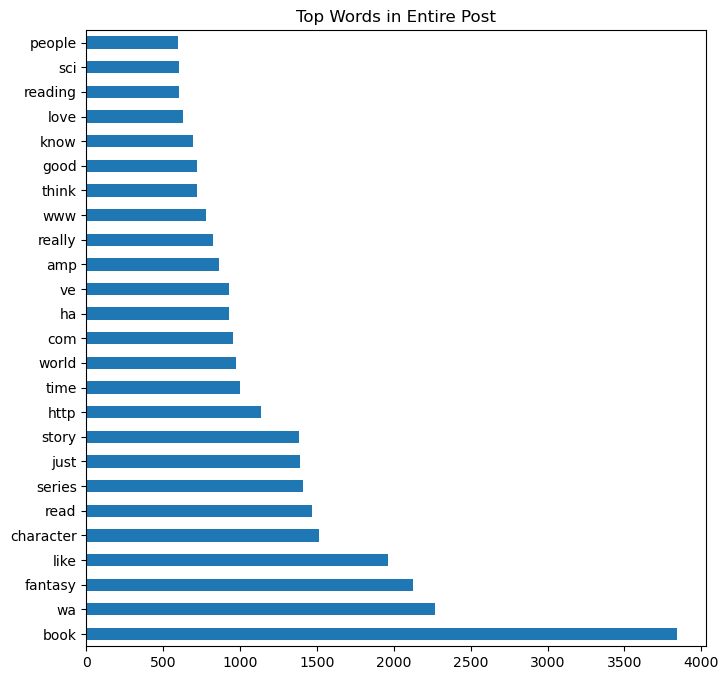

In [32]:
all_cvec = pd.DataFrame(cvec.transform(combined["title_and_post"]).todense(),
                        columns=cvec.get_feature_names_out())

plt.figure(figsize=(8, 8))
all_cvec.sum().sort_values(ascending=False).head(25).plot(kind="barh")
plt.title("Top Words in Entire Post");

In [24]:
# rename columns to eliminate duplicates before combining dataframes
all_cvec.rename(columns={"title": "title_post",
                         "post": "post_post",
                         "subreddit": "subreddit_post"}, inplace=True)

# combine titles and posts with vectorized text dataframe
combined_and_all_cvec = pd.concat((combined, all_cvec), axis=1)

In [26]:
top_10_all = ["book", "wa", "fantasy", "like", "character",
              "read", "series", "just", "story", "http"]

combined_and_all_cvec.groupby(by="subreddit")[top_10_all].sum()

,book,wa,fantasy,like,character,read,series,just,story,http
subreddit,,,,,,,,,,
fantasy,3184,1505,2006,1404,1282,1202,1111,968,982,839
scifi,581,717,79,519,189,235,269,397,363,266


*More strong correlations between reading and fantasy posts. Most of the top words here point to fantasy, which makes me think the words used for scifi posts are more diverse.*

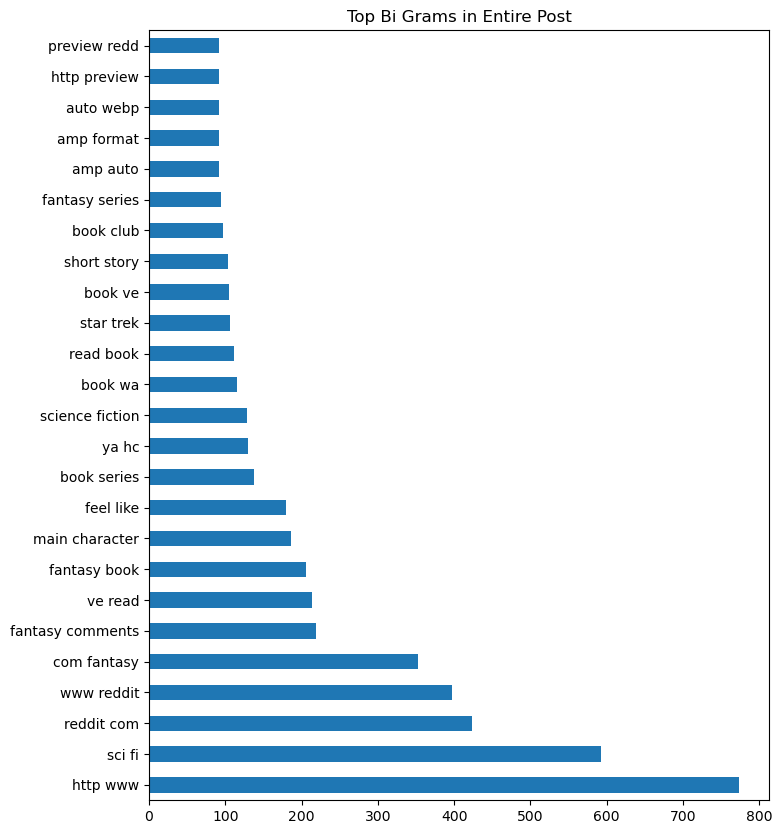

In [33]:
# checking bigrams for titles and posts together
cvec = CountVectorizer(stop_words="english", ngram_range=(2, 2))

cvec.fit(combined["title_and_post"])

all_cvec_bi = pd.DataFrame(cvec.transform(combined["title_and_post"]).todense(),
                           columns=cvec.get_feature_names_out())

plt.figure(figsize=(8, 10))
all_cvec_bi.sum().sort_values(ascending=False).head(25).plot(kind="barh")
plt.title("Top Bi Grams in Entire Post");

In [37]:
# combine data frames
combined_and_all_cvec_bi = pd.concat((combined, all_cvec_bi), axis=1)

# top 10 bigrams
top_10_all_bi = ["http www", "sci fi", "reddit com", "www reddit", "com fantasy",
                 "ve read", "fantasy book", "fantasy comments", "main character", "feel like"]

combined_and_all_cvec_bi.groupby(by="subreddit")[top_10_all_bi].sum()

,http www,sci fi,reddit com,www reddit,com fantasy,ve read,fantasy book,fantasy comments,main character,feel like
subreddit,,,,,,,,,,
fantasy,606,101,395,369,339,186,204,205,149,138
scifi,145,484,15,14,0,24,2,0,33,36


*Most of the bigrams correlate with fantasy, and there are again a lot of "sci fi" mentions in fantasy posts.*

---
## Insights
There are some strong correlations between certain tokens and the fantasy and scifi subreddits. There do appear to be more mentions of science fiction in fantasy posts than vice versa. I'll be interested to see how well CountVectorizer does in my models. There's more I could explore with the text, such as extracting the names of characters of series using SpaCy, but I'm going to stick with the more general words.